# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Yuval 2018
# student 2: Nadav 2071

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#Import necessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
import numpy as np

In [3]:
#Import datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Sample of each dataset
print("Training Data Sample:")
print(train_df.head(5))

print("\nTesting Data Sample:")
print(test_df.head(5))

#Before conducting Exploratory Data Analysis, we'll transform categorical features into numerical values if necessary, clean the data by handling any missing values, and eliminate duplicate entries.

print(train_df.dtypes)

null_counts = train_df.isnull().sum()
print("\nNumber of Nulls per Feature:")
print(null_counts)

duplicate_rows = train_df[train_df.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"\nNumber of Duplicated Instances: {num_duplicates}")
if num_duplicates > 0:
    print(f"\nDuplicate Rows: \n {duplicate_rows}")

Training Data Sample:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Testing Data Sample:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Survived      int6

           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.000000  
max      3.000

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


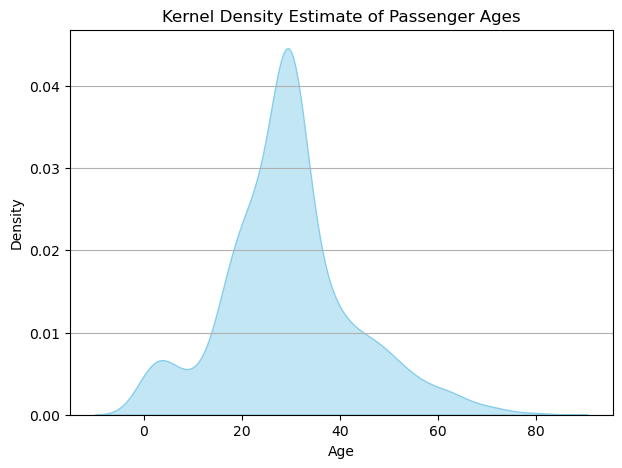

<Figure size 700x500 with 0 Axes>

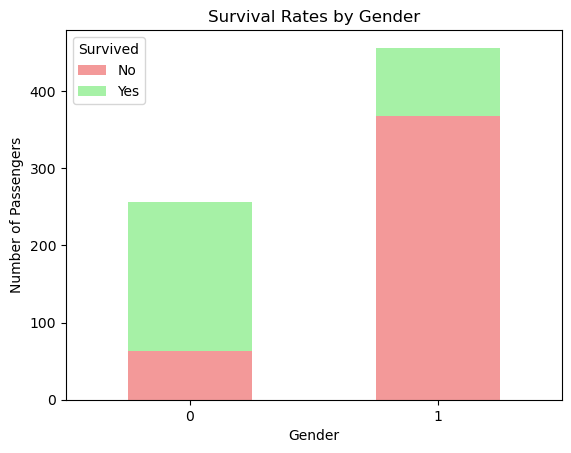

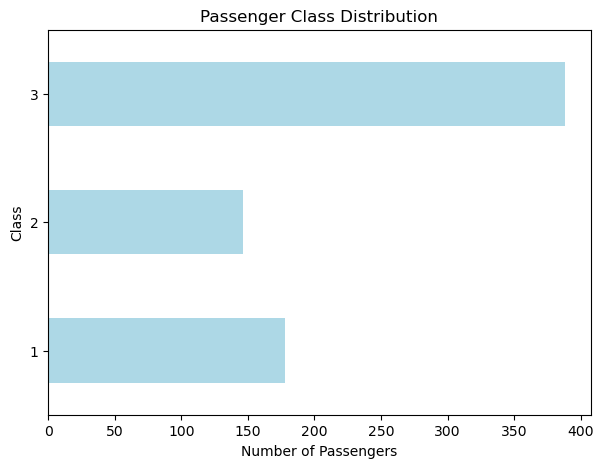

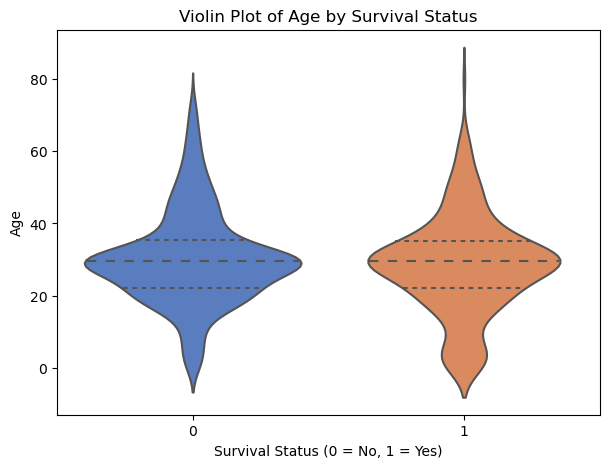

In [5]:
# Exploratory Data Analysis (EDA)
train_data = pd.read_csv('C:/Users/יעקב ממון/Desktop/Titanic assignment/titanic_train.csv')
# 1 - Display summary statistics for all features in the dataset
summary_stats = train_data.describe()
print(summary_stats)

# 2 - Create a KDE plot to visualize the age distribution of passengers
plt.figure(figsize=(7, 5))
sns.kdeplot(train_data['Age'].dropna(), fill=True, color='skyblue', alpha=0.5)
plt.title('Kernel Density Estimate of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

# 3 - Use a grouped bar plot to analyze survival rates based on gender
plt.figure(figsize=(7, 5))
survival_gender_counts = train_data.groupby(['Sex', 'Survived']).size().unstack()
survival_gender_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'], alpha=0.8)
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Survived', labels=['No', 'Yes'])  # Add legend
plt.show()

# 4 - Create a horizontal bar chart to illustrate the distribution of passengers across different classes
plt.figure(figsize=(7, 5))
class_counts = train_data['Pclass'].value_counts()
class_counts.sort_index().plot(kind='barh', color='lightblue')
plt.title('Passenger Class Distribution')
plt.xlabel('Number of Passengers')
plt.ylabel('Class')
plt.show()

# 5 - Use a violin plot to compare the age distribution of survivors and non-survivors
plt.figure(figsize=(7, 5))
sns.violinplot(x='Survived', y='Age', data=train_data, palette='muted', inner='quartile')
plt.title('Violin Plot of Age by Survival Status')
plt.xlabel('Survival Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
# Load your dataset
train_data = pd.read_csv('titanic_train.csv')

# 1 - Split the dataset into training and validation sets (80%-20%)
X = train_data.drop(columns=['Survived'])
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2 - Create a pipeline for KNN (K-Nearest Neighbors) with data scaling
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

# 3 - Define hyperparameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__p': [1, 2, float('inf')]  # p=1 for Manhattan, p=2 for Euclidean, p=INF for Chebyshev
}

# 4 - Perform Grid Search with 5-fold Cross-Validation for KNN
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train, y_train)

# 5 - Display the best hyperparameters and score for KNN
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best F1-Score for KNN:", grid_search_knn.best_score_)

# 6 - Create a pipeline for Naive Bayes
pipeline_nb = Pipeline([
    ('scaler', StandardScaler()), 
    ('nb', GaussianNB())
])

# 7 - No hyperparameters to tune for Naive Bayes
param_grid_nb = {}

# 8 - Perform Grid Search for Naive Bayes
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='f1_macro')
grid_search_nb.fit(X_train, y_train)

# 9 - Display results for Naive Bayes
print("Best Hyperparameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best F1-Score for Naive Bayes:", grid_search_nb.best_score_)

# 10 - Create a pipeline for Decision Tree Classifier
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()), 
    ('dt', DecisionTreeClassifier())
])

# 11 - Define hyperparameter grid for Decision Tree
param_grid_dt = {
    'dt__criterion': ['entropy'],
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

# 12 - Perform Grid Search for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro')
grid_search_dt.fit(X_train, y_train)

# 13 - Display results for Decision Tree
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score for Decision Tree:", grid_search_dt.best_score_)

# 14 - Compare all ML models based on best hyperparameters and scores
results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [
        grid_search_knn.best_params_, 
        grid_search_nb.best_params_, 
        grid_search_dt.best_params_
    ],
    'F1-Macro CV Score': [
        grid_search_knn.best_score_, 
        grid_search_nb.best_score_, 
        grid_search_dt.best_score_
    ],
}
results_df = pd.DataFrame(results)
display(results_df)

# 15 - Retrieve the best estimator model for each ML model
optimal_knn = grid_search_knn.best_estimator_
optimal_nb = grid_search_nb.best_estimator_
optimal_dt = grid_search_dt.best_estimator_

# 16 - Predict survival classification on the validation set
knn_predictions = optimal_knn.predict(X_val)
nb_predictions = optimal_nb.predict(X_val)
dt_predictions = optimal_dt.predict(X_val)

# 17 - Calculate F1 Scores for each model on validation set
knn_f1 = f1_score(y_val, knn_predictions, average='macro')
nb_f1 = f1_score(y_val, nb_predictions, average='macro')
dt_f1 = f1_score(y_val, dt_predictions, average='macro')

# 18 - Display validation results
validation_results = {
    'Model': ['KNN', 'Naive-Bayes', 'Decision Tree'],
    'Best Hyperparameters': [
        grid_search_knn.best_params_, 
        grid_search_nb.best_params_, 
        grid_search_dt.best_params_
    ],
    'F1-Macro Score on Validation': [knn_f1, nb_f1, dt_f1],
}
validation_results_df = pd.DataFrame(validation_results)
display(validation_results_df)

# 19 - Feature Engineering Phase

# 20 - Feature Engineering: Polynomial Features
print("Columns in X_train:", X_train.columns)  # Check available columns
try:
    polynomial_features = X_train[['Age', 'Fare', 'Parch']]
    poly_transformer = PolynomialFeatures(degree=2, include_bias=False)  # Altered to degree=2
    polynomial_transformed = poly_transformer.fit_transform(polynomial_features)
    
    # 21 - Concatenate polynomial features with the original features
    df_poly = pd.DataFrame(polynomial_transformed, columns=poly_transformer.get_feature_names_out(['Age', 'Fare', 'Parch']))
    X_poly = pd.concat([X_train.reset_index(drop=True), df_poly], axis=1)

    # 22 - Display new features after polynomial expansion
    display(X_poly)

    # 23 - Feature Engineering: Omit the least correlated features to the labels
    correlation_with_labels = X_poly.corrwith(y_train)
    least_correlated_features = correlation_with_labels.abs().sort_values().head(6).index
    X_poly.drop(columns=least_correlated_features, inplace=True)

    # 24 - Display the shape of the updated dataset
    print("Shape after dropping least correlated features:", X_poly.shape)

    # 25 - Split the updated dataset for retraining models
    X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_poly, y_train, test_size=0.2, random_state=42)

    # 26 - Repeat the modeling process for the updated dataset with KNN
    pipeline_knn_new = Pipeline([
        ('scaler', StandardScaler()), 
        ('knn', KNeighborsClassifier())
    ])
    grid_search_knn_new = GridSearchCV(pipeline_knn_new, param_grid_knn, cv=5, scoring='f1_macro')
    grid_search_knn_new.fit(X_train_new, y_train_new)

    # 27 - Display results for the new KNN model
    print("Best Hyperparameters for KNN (New Features):", grid_search_knn_new.best_params_)
    print("Best F1-Score for KNN (New Features):", grid_search_knn_new.best_score_)

    # 28 - Repeat for Naive Bayes with new features
    pipeline_nb_new = Pipeline([
        ('scaler', StandardScaler()), 
        ('nb', GaussianNB())
    ])
    grid_search_nb_new = GridSearchCV(pipeline_nb_new, param_grid_nb, cv=5, scoring='f1_macro')
    grid_search_nb_new.fit(X_train_new, y_train_new)

    # 29 - Display results for Naive Bayes with new features
    print("Best Hyperparameters for Naive Bayes (New Features):", grid_search_nb_new.best_params_)
    print("Best F1-Score for Naive Bayes (New Features):", grid_search_nb_new.best_score_)

    # 30 - Repeat for Decision Tree with new features
    pipeline_dt_new = Pipeline([
        ('scaler', StandardScaler()), 
        ('dt', DecisionTreeClassifier())
    ])
    grid_search_dt_new = GridSearchCV(pipeline_dt_new, param_grid_dt, cv=5, scoring='f1_macro')
    grid_search_dt_new.fit(X_train_new, y_train_new)

    # 31 - Display results for Decision Tree with new features
    print("Best Hyperparameters for Decision Tree (New Features):", grid_search_dt_new.best_params_)
    print("Best F1-Score for Decision Tree (New Features):", grid_search_dt_new.best_score_)

except KeyError as e:
    print(f"KeyError: {e}. Available columns: {X_train.columns.tolist()}")


Best Hyperparameters for KNN: {'knn__n_neighbors': 10, 'knn__p': inf}
Best F1-Score for KNN: 0.8019264034150705
Best Hyperparameters for Naive Bayes: {}
Best F1-Score for Naive Bayes: 0.7754586494934872
Best Hyperparameters for Decision Tree: {'dt__criterion': 'entropy', 'dt__max_depth': 10, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 5}
Best F1-Score for Decision Tree: 0.7774877721963108


,Model,Best Hyperparameters,F1-Macro CV Score
0,KNN,"{'knn__n_neighbors': 10, 'knn__p': inf}",0.801926
1,Naive-Bayes,{},0.775459
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.777488


,Model,Best Hyperparameters,F1-Macro Score on Validation
0,KNN,"{'knn__n_neighbors': 10, 'knn__p': inf}",0.761341
1,Naive-Bayes,{},0.733759
2,Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.719318


Columns in X_train: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age,Fare,Parch,Age^2,Age Fare,Age Parch,Fare^2,Fare Parch,Parch^2
0,3,0,43.000000,1,6,46.9000,0,43.000000,46.9000,6.0,1849.000000,2016.700000,258.0,2199.610000,281.400,36.0
1,2,1,24.000000,0,0,13.0000,0,24.000000,13.0000,0.0,576.000000,312.000000,0.0,169.000000,0.000,0.0
2,1,1,38.000000,1,0,90.0000,0,38.000000,90.0000,0.0,1444.000000,3420.000000,0.0,8100.000000,0.000,0.0
3,3,0,24.000000,1,0,15.8500,0,24.000000,15.8500,0.0,576.000000,380.400000,0.0,251.222500,0.000,0.0
4,3,0,41.000000,0,2,20.2125,0,41.000000,20.2125,2.0,1681.000000,828.712500,82.0,408.545156,40.425,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,3,0,29.699118,0,0,8.1375,2,29.699118,8.1375,0.0,882.037589,241.676570,0.0,66.218906,0.000,0.0
565,1,1,29.699118,0,0,26.5500,0,29.699118,26.5500,0.0,882.037589,788.511574,0.0,704.902500,0.000,0.0
566,1,0,30.000000,0,0,86.5000,0,30.000000,86.5000,0.0,900.000000,2595.000000,0.0,7482.250000,0.000,0.0
567,1,1,29.699118,0,0,27.7208,1,29.699118,27.7208,0.0,882.037589,823.283301,0.0,768.442753,0.000,0.0


Shape after dropping least correlated features: (569, 10)
Best Hyperparameters for KNN (New Features): {'knn__n_neighbors': 10, 'knn__p': 2}
Best F1-Score for KNN (New Features): 0.6618780652202982
Best Hyperparameters for Naive Bayes (New Features): {}
Best F1-Score for Naive Bayes (New Features): 0.6583860409355529
Best Hyperparameters for Decision Tree (New Features): {'dt__criterion': 'entropy', 'dt__max_depth': 30, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 2}
Best F1-Score for Decision Tree (New Features): 0.6216523086789607


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [7]:
# Use the best features and model from the experimentation phase
optimal_dt = grid_search_dt_new.best_estimator_

# Train the model on the full training set
optimal_dt.fit(X_train_new, y_train_new)

# Predict on the training set
DT_predictions = optimal_dt.predict(X_train_new)  # or X_val_new if needed

# Calculate F1 Score
DT_F1 = f1_score(y_train_new, DT_predictions, average='macro')

# Prepare validation results in a list of dictionaries
validation_results = [
    {'Model': 'Decision Tree', 'Best Hyperparameters': 'Criterion', 'Value': grid_search_dt_new.best_params_['dt__criterion']},
    {'Model': 'Decision Tree', 'Best Hyperparameters': 'Max Depth', 'Value': grid_search_dt_new.best_params_['dt__max_depth']},
    {'Model': 'Decision Tree', 'Best Hyperparameters': 'Min Samples Leaf', 'Value': grid_search_dt_new.best_params_['dt__min_samples_leaf']},
    {'Model': 'Decision Tree', 'Best Hyperparameters': 'Min Samples Split', 'Value': grid_search_dt_new.best_params_['dt__min_samples_split']},
    {'Model': 'Decision Tree', 'Best Hyperparameters': 'F1-Macro Score on whole Train-set', 'Value': DT_F1}
]

# Create a DataFrame for the validation results
validation_results_df = pd.DataFrame(validation_results)

# Display the results
display(validation_results_df)

,Model,Best Hyperparameters,Value
0,Decision Tree,Criterion,entropy
1,Decision Tree,Max Depth,30
2,Decision Tree,Min Samples Leaf,2
3,Decision Tree,Min Samples Split,2
4,Decision Tree,F1-Macro Score on whole Train-set,0.783936


## Part 5 - Apply on test and show model performance estimation

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load data
test_data = pd.read_csv('C:/Users/יעקב ממון/Desktop/Titanic assignment/titanic_train.csv')

# Prepare features and labels
features = test_data.drop(columns=['Survived'])
labels = test_data['Survived']

# Display the features and labels
display(features)
display(labels)

# Polynomial feature transformation
poly_features = features[['Age', 'Fare', 'Parch']]
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
poly_transformed = poly_transformer.fit_transform(poly_features)
poly_feature_names = poly_transformer.get_feature_names_out(['Age', 'Fare', 'Parch'])
poly_df = pd.DataFrame(poly_transformed, columns=poly_feature_names)

# Reset index and concatenate
features.reset_index(drop=True, inplace=True)
features = pd.concat([features, poly_df], axis=1)

# Feature Engineering Method - Omitting the 6 least correlated features to the labels
feature_correlations = features.corrwith(labels)

# Drop 6 of the least correlated features
features = features.drop(columns=feature_correlations.abs().sort_values().head(6).index)

# Train Decision Tree model
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 10]
}

decision_tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(decision_tree, param_grid, cv=5)
grid_search_tree.fit(features, labels)

# Get the best model
optimal_tree_model = grid_search_tree.best_estimator_

# Predictions using Decision Tree
tree_predictions = optimal_tree_model.predict(features)
predictions_series = pd.Series(tree_predictions)

# Top 5 predictions
top_predictions = {
    "Predictions": predictions_series.head(),
    "Ground Truths": labels.head()
}
top_predictions_df = pd.DataFrame(top_predictions)
display(top_predictions_df)

# F1 Score
tree_f1 = f1_score(labels, tree_predictions, average='macro')
results_summary = {
    'Model': 'Decision Tree',
    'Best Hyperparameters': grid_search_tree.best_params_,
    'F1-Macro Score on Whole Test-set': tree_f1
}

# Confusion Matrix
confusion_matrix_result = confusion_matrix(labels, tree_predictions)

# Display results
print("Confusion Matrix:\n", confusion_matrix_result)
results_summary_df = pd.DataFrame(results_summary)
display(results_summary_df)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,54.000000,1,0,78.2667,1
1,2,0,45.000000,0,0,13.5000,0
2,3,1,20.000000,0,0,9.5000,0
3,3,1,36.000000,0,0,7.8958,0
4,3,1,22.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0
708,3,1,14.000000,5,2,46.9000,0
709,2,0,6.000000,0,1,33.0000,0
710,2,1,29.699118,0,0,0.0000,0


0      1
1      1
2      0
3      0
4      0
      ..
707    0
708    0
709    1
710    0
711    0
Name: Survived, Length: 712, dtype: int64

,Predictions,Ground Truths
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0


Confusion Matrix:
 [[413  18]
 [ 55 226]]


,Model,Best Hyperparameters,F1-Macro Score on Whole Test-set
criterion,Decision Tree,gini,0.889876
max_depth,Decision Tree,10,0.889876
min_samples_leaf,Decision Tree,1,0.889876
min_samples_split,Decision Tree,10,0.889876
